# En este proyecto de Data Science, trabajaré con un dataset bancario que contiene información sobre clientes de un banco. El objetivo será construir un modelo de Machine Learning que pueda predecir si un cliente dejará o no el banco. El dataset está disponible en Kaggle en el siguiente enlace: https://www.kaggle.com/shrutimechlearn/churn-modelling

# Paso 1: Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# Paso 2: Importación de datos

In [6]:
data = pd.read_csv("Churn_Modelling.csv")


In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Paso 3: Limpieza de datos

In [3]:
# Eliminar columnas innecesarias
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)



In [4]:
# Codificar variables categóricas
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'])

In [5]:
# Escalar los datos
scaler = StandardScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# Paso 4: Análisis y visualización de datos

In [10]:
# Correlación de Pearson
corr = data.corr()

C:\Users\stanl\AppData\Local\Temp\ipykernel_7324\3647745838.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


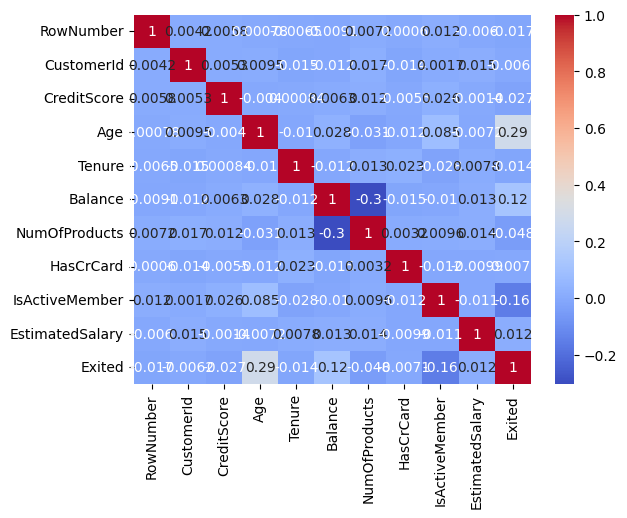

In [11]:
# Heatmap de correlación
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

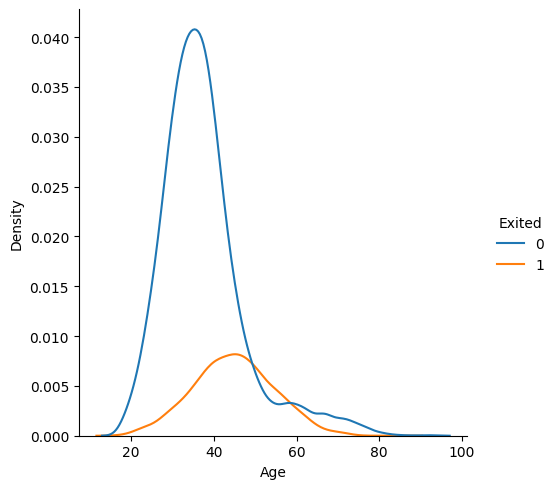

In [12]:
# Distribución de las variables
sns.displot(data, x='Age', hue='Exited', kind='kde')
plt.show()

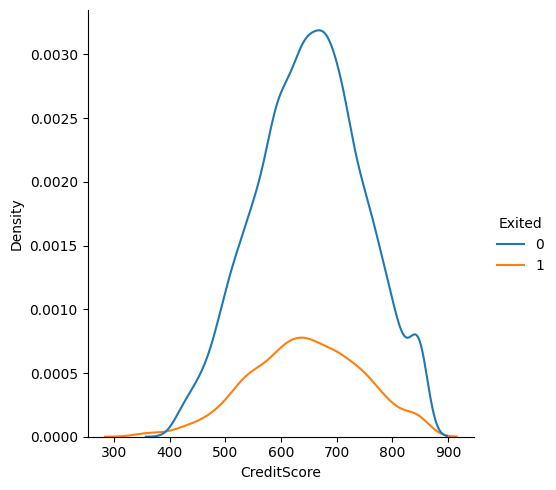

In [13]:
sns.displot(data, x='CreditScore', hue='Exited', kind='kde')
plt.show()

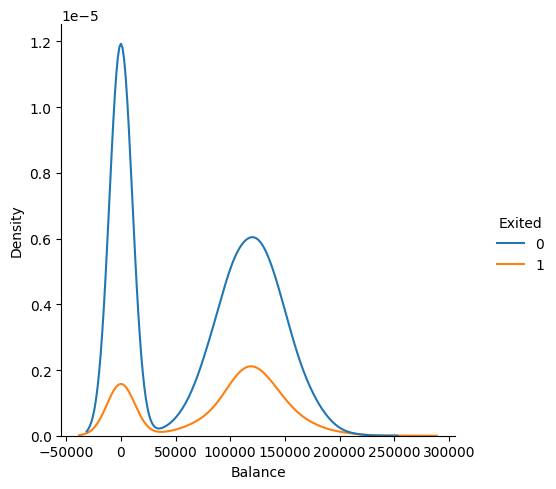

In [14]:
sns.displot(data, x='Balance', hue='Exited', kind='kde')
plt.show()

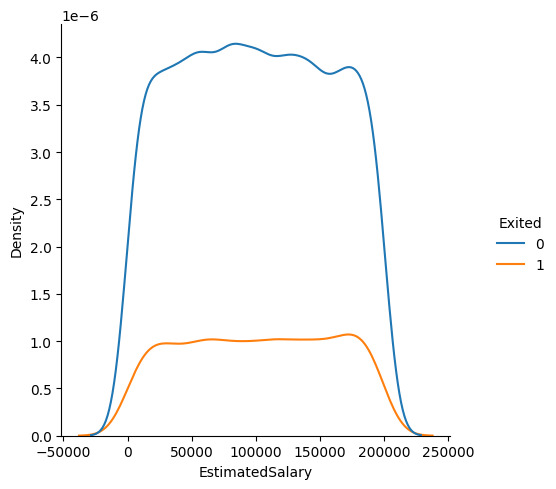

In [15]:
sns.displot(data, x='EstimatedSalary', hue='Exited', kind='kde')
plt.show()

# Paso 5: Modelado de Machine Learning

In [16]:
# División de los datos en conjunto de entrenamiento y de prueba
X = data.drop('Exited', axis=1)
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Transformación de las variables categóricas
from sklearn.preprocessing import OneHotEncoder


In [22]:
# Selecciona las columnas con variables categóricas
cat_cols = ["Ciudad", "Comida favorita"]

In [23]:
# Crea el codificador one-hot
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)